In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("london_merged.csv")

In [2]:
data.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [3]:
new_data = []

In [4]:
row = data.shape[0]
data.head()
# row

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


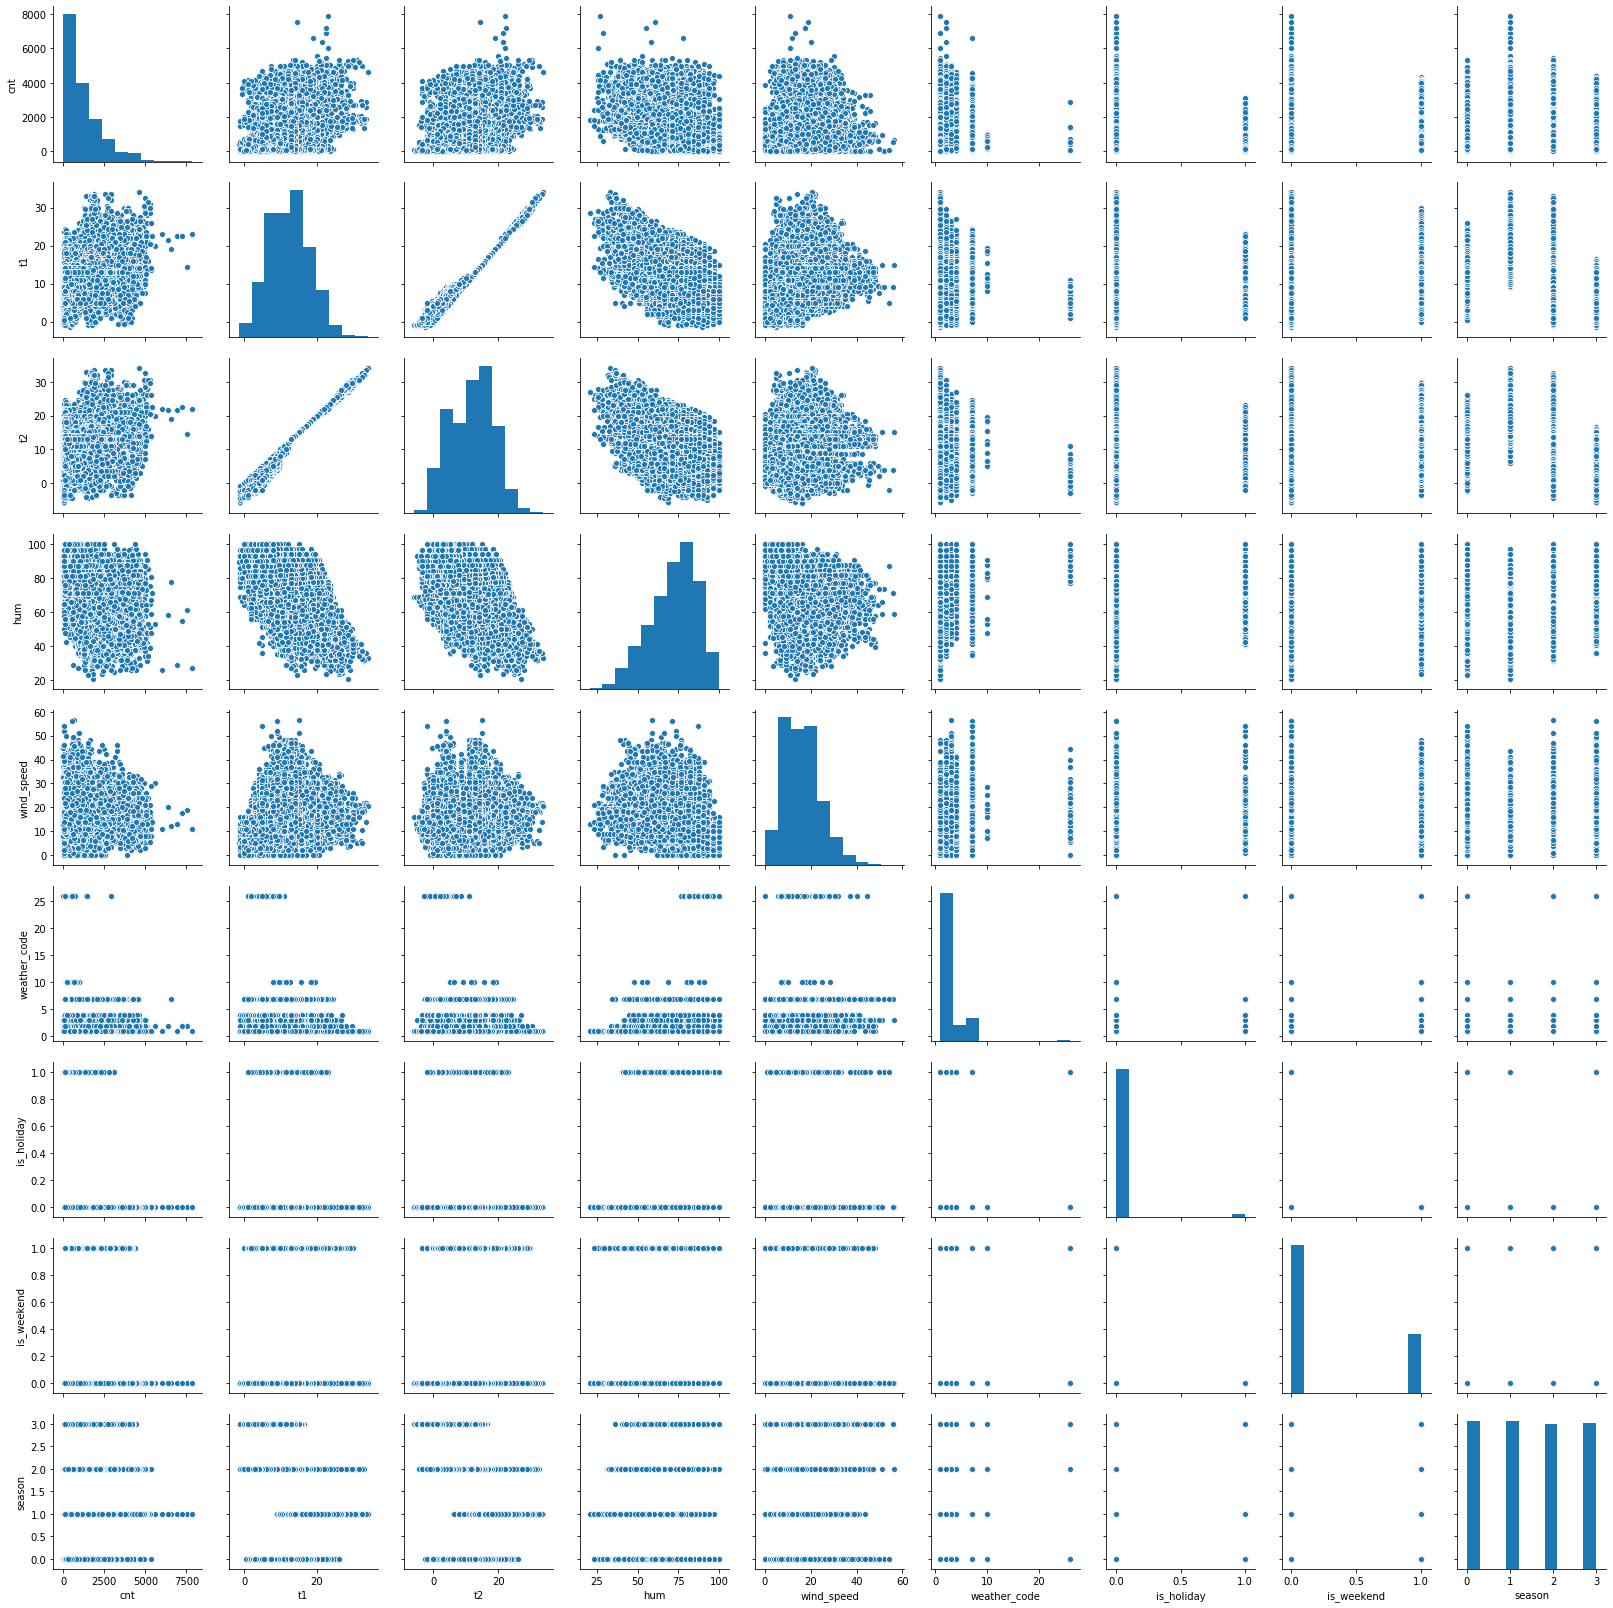

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.pairplot(data = data)

In [10]:
data.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


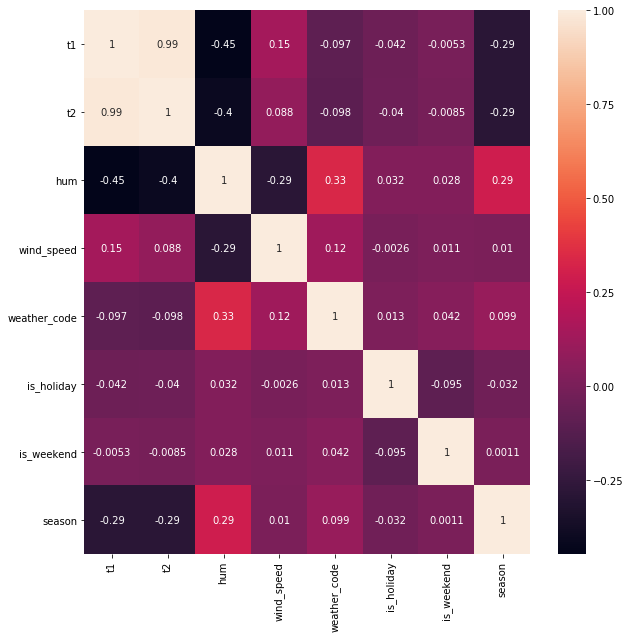

In [19]:
columns=data.columns
# print(columns)
corr=data[columns].corr()
# print(corr)
plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [6]:
'''
1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
2 = scattered clouds / few clouds
3 = Broken clouds
4 = Cloudy
7 = Rain/ light Rain shower/ Light rain
10 = rain with thunderstorm
26 = snowfall
94 = Freezing Fog
'''
data['weather_clear'] = 0
data['weather_scatter'] = 0
data['weather_broken'] = 0
data['weather_cloudy'] = 0
data['weather_lightRain'] = 0
data['weather_thunderRain'] = 0
data['weather_snowFall'] = 0
data['weather_freezingFog'] = 0

data['spring'] = 0
data['summer'] = 0
data['fall'] = 0
data['winter'] = 0

for i in range(row):
    if data.loc[i,'weather_code']== 1:
        data.loc[i,'weather_clear']=1
    elif data.loc[i,'weather_code']==2:
        data.loc[i,'weather_scatter']=1
    elif data.loc[i,'weather_code']==3:
        data.loc[i,'weather_broken']=1
    elif data.loc[i,'weather_code']==4:
        data.loc[i,'weather_cloudy']=1
    elif data.loc[i,'weather_code']==7:
        data.loc[i,'weather_lightRain']=1
    elif data.loc[i,'weather_code']==10:
        data.loc[i,'weather_thunderRain']=1
    elif data.loc[i,'weather_code']==26:
        data.loc[i,'weather_snowFall']=1
    elif data.loc[i,'weather_code']==94:
        data.loc[i,'weather_freezingFog']=1
        
for i in range(row):
    if data.loc[i,'season']== 0:
        data.loc[i,'spring']=1
    elif data.loc[i,'season']==1:
        data.loc[i,'summer']=1
    elif data.loc[i,'season']==2:
        data.loc[i,'fall']=1
    elif data.loc[i,'season']==3:
        data.loc[i,'winter']=1
    
data.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,...,weather_broken,weather_cloudy,weather_lightRain,weather_thunderRain,weather_snowFall,weather_freezingFog,spring,summer,fall,winter
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,...,1,0,0,0,0,0,0,0,0,1
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,...,0,0,0,0,0,0,0,0,0,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,...,0,0,0,0,0,0,0,0,0,1
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,...,0,0,0,0,0,0,0,0,0,1
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
data = data.drop(['weather_code','season'],axis = 1)
data.head()

,timestamp,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend,weather_clear,weather_scatter,weather_broken,weather_cloudy,weather_lightRain,weather_thunderRain,weather_snowFall,weather_freezingFog,spring,summer,fall,winter
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,0.0,1.0,0,0,1,0,0,0,0,0,0,0,0,1
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,1
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,1
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,1


In [8]:
data.to_csv('london_bikes_hotcode.csv', encoding='utf8')